In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from textblob import TextBlob
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("E:/Desktop/ITU/DATA_SCIENCE_ACADEMY/Project4/yelp_review_reorganized_2.csv")
df

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,JbwIayfXknRekD2vaGSLFg,KxSZZuznOXC50sVghTHdVg,dT3EKh0NBuTvqlCGaoD89g,5,2017-09-09,If you are looking for a massage therapist tha...,0,0,0
1,9S1kYZYigvGV_q-YpQSClQ,V5qA2u8lj1h7wwyUOYXuxQ,qSkTU59kY9VB_RKTtfe2Fw,3,2017-05-25,Good time...\nChill environment...\nJust findi...,0,0,0
2,aQMAKSY7T2txORFmoUxdTA,7dm3xgA2o87c0BbXWDaHuA,WbJ1LRQdOuYYlRLyTkuuxw,1,2017-09-18,Was excited about this place but found the foo...,0,0,0
3,s3Z3KCGcYFnP88YuBRilAg,XNwSTHu8MNPrXrfeOdifNw,1_SbdpAt9n8C1p8UOE9KQw,5,2017-04-07,"Great customer service, he took his time and d...",0,0,0
4,LOFAwYSM-30GEOccPbPbNg,pIz1tKPqiXrSEJMqvL0p2g,2t-a8qkgoRiiohThDVjfNw,4,2017-11-07,Food is delicious. This was my 2nd visit here ...,0,0,0
...,...,...,...,...,...,...,...,...,...
19995,gHYdnPVKZuptCac6xcUyRg,BGVffqLypE24HLuH0I3Vjg,9a3DrZvpYxVs3k_qwlCNSw,4,2017-01-05,Outdoor patio - gorgeous. Food - excellent and...,0,0,0
19996,YoqVqSNPQhPtIcF7TiNZuQ,hRzmoL0CSupxgG8jxlFnqA,W9y-Bl9030-rmfxSTmUD_g,5,2017-01-21,"Fresh, cooked perfectly, super tasty. Price\/...",0,0,0
19997,FtXq3wLCOgpY-jpPOZvfTA,ju5QIg3E6QbcZhtG-gF6Qw,YLL7tZjII-lsEprbfVkMzQ,3,2017-02-15,"This is inside Bally's casino food court, $8.0...",0,0,0
19998,faDwQ86k8cBaZr18yEthHg,24XaqtAxkpY4Br0YP1HRsw,RESDUcs7fIiihp38-d6_6g,5,2017-07-03,My favorite buffet in Vegas. \n\nI always go s...,0,0,0


In [3]:
df['customer_no'] = np.arange(len(df))

In [4]:
df["customer_no"] = df["customer_no"].apply(lambda x: "Customer" + str(x))

In [5]:
df = df.set_index("customer_no").reset_index()

In [6]:
df.drop(["review_id","user_id","business_id"], axis=1, inplace=True)

In [7]:
df

,customer_no,stars,date,text,useful,funny,cool
0,Customer0,5,2017-09-09,If you are looking for a massage therapist tha...,0,0,0
1,Customer1,3,2017-05-25,Good time...\nChill environment...\nJust findi...,0,0,0
2,Customer2,1,2017-09-18,Was excited about this place but found the foo...,0,0,0
3,Customer3,5,2017-04-07,"Great customer service, he took his time and d...",0,0,0
4,Customer4,4,2017-11-07,Food is delicious. This was my 2nd visit here ...,0,0,0
...,...,...,...,...,...,...,...
19995,Customer19995,4,2017-01-05,Outdoor patio - gorgeous. Food - excellent and...,0,0,0
19996,Customer19996,5,2017-01-21,"Fresh, cooked perfectly, super tasty. Price\/...",0,0,0
19997,Customer19997,3,2017-02-15,"This is inside Bally's casino food court, $8.0...",0,0,0
19998,Customer19998,5,2017-07-03,My favorite buffet in Vegas. \n\nI always go s...,0,0,0


In [8]:
from langdetect import detect

In [9]:
for index, row in df['text'].iteritems():
    lang = detect(row) #detecting each row
    df.loc[index, 'Language'] = lang

In [10]:
pd.DataFrame(df.Language.value_counts())

,Language
en,19880
fr,74
de,18
es,15
zh-cn,5
ja,3
pt,1
it,1
no,1
zh-tw,1


In [11]:
df = df[df["Language"]=="en"]
df

,customer_no,stars,date,text,useful,funny,cool,Language
0,Customer0,5,2017-09-09,If you are looking for a massage therapist tha...,0,0,0,en
1,Customer1,3,2017-05-25,Good time...\nChill environment...\nJust findi...,0,0,0,en
2,Customer2,1,2017-09-18,Was excited about this place but found the foo...,0,0,0,en
3,Customer3,5,2017-04-07,"Great customer service, he took his time and d...",0,0,0,en
4,Customer4,4,2017-11-07,Food is delicious. This was my 2nd visit here ...,0,0,0,en
...,...,...,...,...,...,...,...,...
19995,Customer19995,4,2017-01-05,Outdoor patio - gorgeous. Food - excellent and...,0,0,0,en
19996,Customer19996,5,2017-01-21,"Fresh, cooked perfectly, super tasty. Price\/...",0,0,0,en
19997,Customer19997,3,2017-02-15,"This is inside Bally's casino food court, $8.0...",0,0,0,en
19998,Customer19998,5,2017-07-03,My favorite buffet in Vegas. \n\nI always go s...,0,0,0,en


In [12]:
df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19880 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customer_no  19880 non-null  object        
 1   stars        19880 non-null  int64         
 2   date         19880 non-null  datetime64[ns]
 3   text         19880 non-null  object        
 4   useful       19880 non-null  int64         
 5   funny        19880 non-null  int64         
 6   cool         19880 non-null  int64         
 7   Language     19880 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 1.4+ MB


In [14]:
df["date"].describe()

count                   19880
unique                    345
top       2017-07-15 00:00:00
freq                       90
first     2017-01-01 00:00:00
last      2017-12-11 00:00:00
Name: date, dtype: object

In [15]:
#df.to_csv("E:/Desktop/yelp_new.csv", index=False)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19880 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customer_no  19880 non-null  object        
 1   stars        19880 non-null  int64         
 2   date         19880 non-null  datetime64[ns]
 3   text         19880 non-null  object        
 4   useful       19880 non-null  int64         
 5   funny        19880 non-null  int64         
 6   cool         19880 non-null  int64         
 7   Language     19880 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 1.4+ MB


In [17]:
df["stars"].value_counts()

5    9894
4    3548
1    3218
3    1783
2    1437
Name: stars, dtype: int64

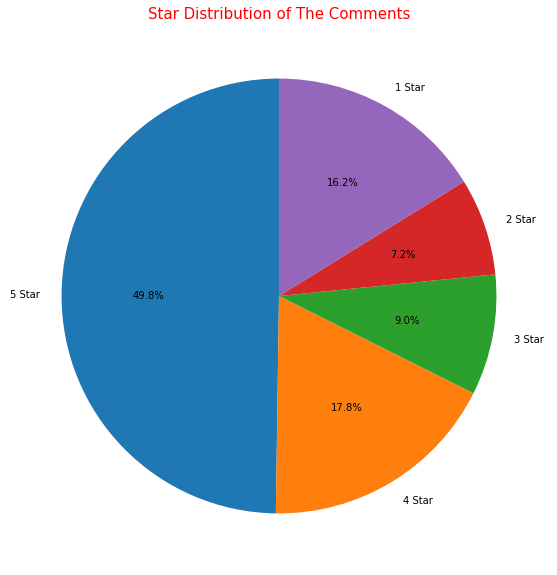

In [63]:
plt.figure(figsize = [15, 10])
label = '5 Star', '4 Star', '3 Star', '2 Star','1 Star'
star_count = [9894, 3548, 1783, 1437, 3218]
plt.pie(star_count, labels=label, autopct='%1.1f%%', startangle=90)
plt.title("Star Distribution of The Comments", c="red", fontsize=15)
#plt.savefig('E:/Desktop/ITU/DATA_SCIENCE_ACADEMY/Project4/StarDistributionofComments2.png', dpi=200)

In [19]:
import re
import string

In [20]:
df["text"] = df["text"].apply(lambda x: re.sub("[%s]" % re.escape(string.punctuation), " ",x.lower())) # Remove punctuations and lower
df["text"] = df["text"].apply(lambda x: re.sub("\w*\d\w*", " ",x)) # Remove numbers
df["text"] = df["text"].apply(lambda x: re.sub("\n"," ",x)) # Remove \n

In [21]:
df["text"]

0        if you are looking for a massage therapist tha...
1        good time    chill environment    just finding...
2        was excited about this place but found the foo...
3        great customer service  he took his time and d...
4        food is delicious  this was my   visit here an...
                               ...                        
19995    outdoor patio   gorgeous  food   excellent and...
19996    fresh  cooked perfectly  super tasty   price  ...
19997    this is inside bally s casino food court      ...
19998    my favorite buffet in vegas    i always go str...
19999    ommmg ordered the strawberry bobba smoothie an...
Name: text, Length: 19880, dtype: object

In [22]:
df

,customer_no,stars,date,text,useful,funny,cool,Language
0,Customer0,5,2017-09-09,if you are looking for a massage therapist tha...,0,0,0,en
1,Customer1,3,2017-05-25,good time chill environment just finding...,0,0,0,en
2,Customer2,1,2017-09-18,was excited about this place but found the foo...,0,0,0,en
3,Customer3,5,2017-04-07,great customer service he took his time and d...,0,0,0,en
4,Customer4,4,2017-11-07,food is delicious this was my visit here an...,0,0,0,en
...,...,...,...,...,...,...,...,...
19995,Customer19995,4,2017-01-05,outdoor patio gorgeous food excellent and...,0,0,0,en
19996,Customer19996,5,2017-01-21,fresh cooked perfectly super tasty price ...,0,0,0,en
19997,Customer19997,3,2017-02-15,this is inside bally s casino food court ...,0,0,0,en
19998,Customer19998,5,2017-07-03,my favorite buffet in vegas i always go str...,0,0,0,en


In [23]:
def sentiment(star):
    if star >= 4:
        return "Positive"
    elif star == 3:
        return "Neutral"
    else:
        return "Negative"

In [24]:
df["sentiment"] = df["stars"].apply(sentiment)

In [25]:
df

,customer_no,stars,date,text,useful,funny,cool,Language,sentiment
0,Customer0,5,2017-09-09,if you are looking for a massage therapist tha...,0,0,0,en,Positive
1,Customer1,3,2017-05-25,good time chill environment just finding...,0,0,0,en,Neutral
2,Customer2,1,2017-09-18,was excited about this place but found the foo...,0,0,0,en,Negative
3,Customer3,5,2017-04-07,great customer service he took his time and d...,0,0,0,en,Positive
4,Customer4,4,2017-11-07,food is delicious this was my visit here an...,0,0,0,en,Positive
...,...,...,...,...,...,...,...,...,...
19995,Customer19995,4,2017-01-05,outdoor patio gorgeous food excellent and...,0,0,0,en,Positive
19996,Customer19996,5,2017-01-21,fresh cooked perfectly super tasty price ...,0,0,0,en,Positive
19997,Customer19997,3,2017-02-15,this is inside bally s casino food court ...,0,0,0,en,Neutral
19998,Customer19998,5,2017-07-03,my favorite buffet in vegas i always go str...,0,0,0,en,Positive


In [26]:
df.sentiment.value_counts()

Positive    13442
Negative     4655
Neutral      1783
Name: sentiment, dtype: int64

In [27]:
df.stars.value_counts()

5    9894
4    3548
1    3218
3    1783
2    1437
Name: stars, dtype: int64

In [28]:
df.groupby("stars").mean()

,useful,funny,cool
stars,,,
1,0.906464,0.263518,0.110317
2,0.816980,0.299235,0.213640
3,1.049916,0.478968,0.632081
4,0.977170,0.383315,0.697012
5,0.597938,0.177582,0.366384


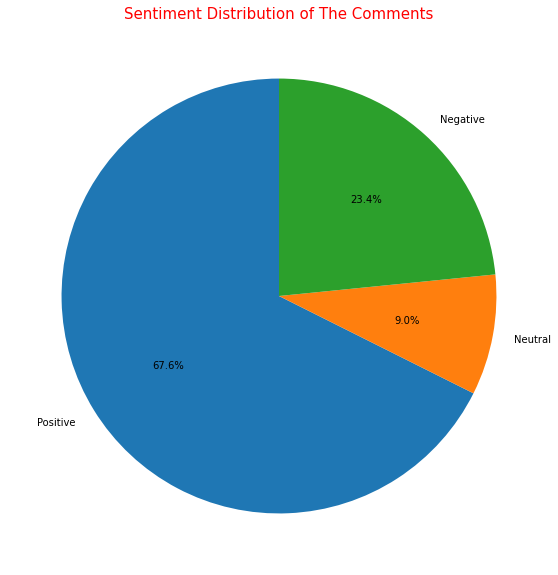

In [62]:
plt.figure(figsize = [15, 10])
label = 'Positive', 'Neutral', 'Negative'
star_count = [13442, 1783, 4655]
plt.pie(star_count, labels=label, autopct='%1.1f%%', startangle=90)
plt.title("Sentiment Distribution of The Comments", c="red", fontsize=15)
#plt.savefig('E:/Desktop/ITU/DATA_SCIENCE_ACADEMY/Project4/SentimentDistributionofComments2.png', dpi=200)

In [30]:
data = df.groupby('sentiment')[['useful','funny','cool']].mean()
data

,useful,funny,cool
sentiment,,,
Negative,0.878840,0.274544,0.142213
Neutral,1.049916,0.478968,0.632081
Positive,0.698036,0.231885,0.453653


In [31]:
data_new = data.reset_index()
data_new

,sentiment,useful,funny,cool
0,Negative,0.878840,0.274544,0.142213
1,Neutral,1.049916,0.478968,0.632081
2,Positive,0.698036,0.231885,0.453653


<Figure size 1080x720 with 0 Axes>

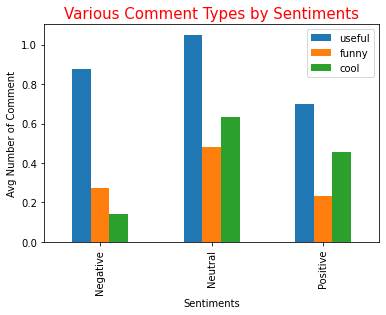

In [61]:
plt.figure(figsize = [15, 10])

data_new.plot(x="sentiment", y=["useful","funny", "cool"], kind="bar")
 
plt.xlabel("Sentiments")
plt.ylabel("Avg Number of Comment")
plt.title("Various Comment Types by Sentiments", c="red", fontsize=15)
#plt.savefig('E:/Desktop/ITU/DATA_SCIENCE_ACADEMY/Project4/CommentTypesbySentiments2.png', dpi=200)

In [33]:
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [34]:
n2_bigrams = get_top_n_gram(df['text'],(2,2),20)
n3_bigrams = get_top_n_gram(df['text'],(3,3),20)

In [35]:
n2_bigrams

[('customer service', 1286),
 ('highly recommend', 931),
 ('ice cream', 613),
 ('really good', 594),
 ('great service', 520),
 ('las vegas', 488),
 ('food good', 487),
 ('staff friendly', 463),
 ('great food', 440),
 ('make sure', 438),
 ('service great', 414),
 ('pretty good', 408),
 ('love place', 401),
 ('great place', 383),
 ('happy hour', 364),
 ('food great', 359),
 ('good food', 358),
 ('feel like', 348),
 ('definitely recommend', 345),
 ('recommend place', 324)]

In [36]:
n3_bigrams

[('great customer service', 159),
 ('did great job', 116),
 ('highly recommend place', 97),
 ('food great service', 82),
 ('definitely recommend place', 66),
 ('service great food', 62),
 ('staff super friendly', 59),
 ('great food great', 58),
 ('staff friendly helpful', 56),
 ('food really good', 54),
 ('did amazing job', 53),
 ('food good service', 51),
 ('excellent customer service', 50),
 ('great service great', 48),
 ('sweet potato fries', 48),
 ('seated right away', 47),
 ('good customer service', 44),
 ('love love love', 44),
 ('say good things', 43),
 ('food pretty good', 43)]

In [37]:
df_negative = df[df["sentiment"]=="Negative"]
df_positive = df[df["sentiment"]=="Positive"]
df_neutral = df[df["sentiment"]=="Neutral"]

In [38]:
n2_bigrams_negative = get_top_n_gram(df_negative['text'],(2,2),20)
n3_bigrams_negative = get_top_n_gram(df_negative['text'],(3,3),20)

In [64]:
n2_bigrams_neutral = get_top_n_gram(df_neutral['text'],(2,2),20)
n3_bigrams_neutral = get_top_n_gram(df_neutral['text'],(3,3),20)

In [39]:
n2_bigrams_positive = get_top_n_gram(df_positive['text'],(2,2),20)
n3_bigrams_positive = get_top_n_gram(df_positive['text'],(3,3),20)

In [40]:
n3_bigrams_positive

[('great customer service', 142),
 ('did great job', 111),
 ('highly recommend place', 96),
 ('food great service', 75),
 ('definitely recommend place', 63),
 ('great food great', 57),
 ('staff super friendly', 55),
 ('service great food', 52),
 ('staff friendly helpful', 51),
 ('did amazing job', 50),
 ('excellent customer service', 47),
 ('great service great', 46),
 ('say good things', 43),
 ('food really good', 41),
 ('sweet potato fries', 41),
 ('love love love', 40),
 ('overall great experience', 35),
 ('did excellent job', 34),
 ('delicious delicious delicious', 34),
 ('great food service', 32)]

In [65]:
n3_bigrams_neutral

[('food pretty good', 12),
 ('food really good', 11),
 ('food good service', 11),
 ('did good job', 8),
 ('really wanted like', 8),
 ('good customer service', 8),
 ('overall food good', 7),
 ('pretty good food', 7),
 ('don think ll', 7),
 ('food just ok', 7),
 ('just tasted like', 7),
 ('food average best', 6),
 ('service great food', 6),
 ('ice cream shop', 6),
 ('food average prices', 5),
 ('ve definitely better', 5),
 ('southern fried chicken', 5),
 ('took long time', 5),
 ('probably wouldn come', 5),
 ('seated right away', 5)]

In [41]:
n3_bigrams_negative

[('worst customer service', 38),
 ('horrible customer service', 34),
 ('poor customer service', 34),
 ('terrible customer service', 34),
 ('don waste time', 25),
 ('waste time money', 23),
 ('bad customer service', 18),
 ('long story short', 17),
 ('don think ll', 16),
 ('asked speak manager', 14),
 ('great customer service', 13),
 ('really wanted like', 13),
 ('lack customer service', 12),
 ('good customer service', 12),
 ('wanted like place', 12),
 ('don know doing', 11),
 ('let start saying', 11),
 ('food good service', 11),
 ('got food poisoning', 10),
 ('seated right away', 10)]

# Data Modeling

In [42]:
X = df.text
y = df.sentiment

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

cv1 = CountVectorizer(stop_words='english')

X_train_cv1 = cv1.fit_transform(X_train)
X_test_cv1  = cv1.transform(X_test)

pd.DataFrame(X_train_cv1.toarray(), columns=cv1.get_feature_names()).head()

,aa,aaa,aaaaand,aaaamazing,aaah,aaamazing,aaarrrgghhhhh,aads,aahhhhhhhmaaaazing,aamrass,...,żywiec,イマイチ,但是服务超级差的餐厅,十分失望對素菜麵的水準,吃饭过程中恰逢餐厅打烊时间,服务员非常没礼貌的频繁恶语催促,油条,点解会有牛柏葉喺我哋碟麵到㗎,菜品还行,赶客人离开
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Logistic Regression Classifier

In [45]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [46]:
lr.fit(X_train_cv1, y_train)
y_pred_cv1 = lr.predict(X_test_cv1)

In [47]:
# Create a function to calculate the error metrics, since we'll be doing this several times
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def conf_matrix(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, xticklabels=['Pred_Negative','Pred_Neutral', 'Pred_Positive'], 
                yticklabels=['Act_Negative','Act_Neutral', 'Act_Positive'], annot=True,
                fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");

    a_neg, a_neu, a_pos = cm[0]
    b_neg, b_neu, b_pos = cm[1]
    c_neg, c_neu, c_pos = cm[2]

    accuracy = round((a_neg + b_neu + c_pos) / (a_neg+a_neu+a_pos + b_neg+b_neu+b_pos + c_neg+c_neu+c_pos),2)
    negative = round((a_neg) / (a_neg+a_neu+a_pos),2)
    neutral = round((b_neu) / (b_neg+b_neu+b_pos),2)
    positive = round((c_pos) / (c_neg+c_neu+c_pos),2)

    cm_results = [accuracy, negative, neutral, positive]
    return cm_results

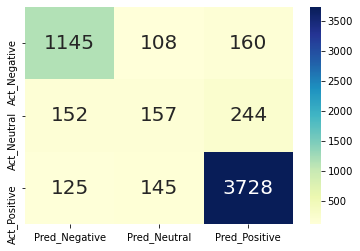

In [48]:
# The heat map for the first logistic regression model
cm1 = conf_matrix(y_test, y_pred_cv1)

## Naive Bayes Classifier

In [49]:
# Fit the first Naive Bayes model
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train_cv1, y_train)

y_pred_cv1_nb = mnb.predict(X_test_cv1)

In [50]:
# Fit the second Naive Bayes model
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(X_train_cv1, y_train)

y_pred_cv2_nb = bnb.predict(X_test_cv1)

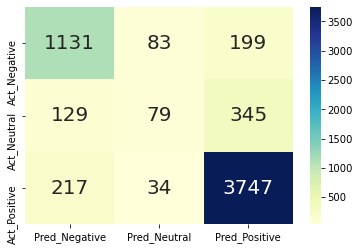

In [51]:
# Here's the heat map for the first Naive Bayes model
cm3 = conf_matrix(y_test, y_pred_cv1_nb)

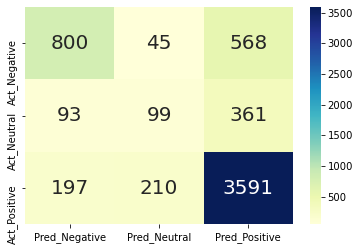

In [52]:
# Here's the heat map for the second Naive Bayes model
cm4 = conf_matrix(y_test, y_pred_cv2_nb)

## KNN Classifier

In [53]:
from sklearn.neighbors import KNeighborsClassifier
# Fit the first KNN model
knn = KNeighborsClassifier(3)
knn.fit(X_train_cv1, y_train)

y_pred_cv1_knn = knn.predict(X_test_cv1)

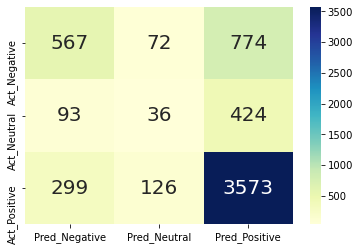

In [54]:
cm5 = conf_matrix(y_test, y_pred_cv1_knn)

## Try using TF-IDF instead of Count Vectorizer

In [55]:
# Create TF-IDF versions of the Count Vectorizers created earlier in the exercise
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf1 = TfidfVectorizer(stop_words='english')
X_train_tfidf1 = tfidf1.fit_transform(X_train)
X_test_tfidf1  = tfidf1.transform(X_test)

## Logistic Regression

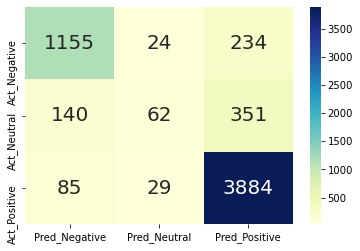

In [56]:
# Fit the first logistic regression on the TF-IDF data
lr.fit(X_train_tfidf1, y_train)
y_pred_tfidf1_lr = lr.predict(X_test_tfidf1)
cm6 = conf_matrix(y_test, y_pred_tfidf1_lr)

## Naive Bayes

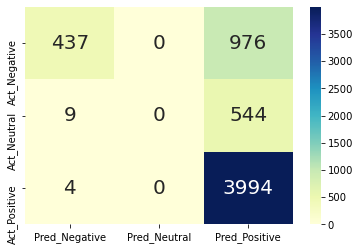

In [57]:
# Fit the first Naive Bayes model on the TF-IDF data
mnb.fit(X_train_tfidf1.toarray(), y_train)
y_pred_tfidf1_nb = mnb.predict(X_test_tfidf1)
cm7 = conf_matrix(y_test, y_pred_tfidf1_nb)

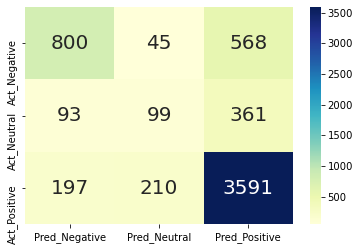

In [58]:
# Fit the second Naive Bayes model on the TF-IDF data
bnb.fit(X_train_tfidf1.toarray(), y_train)
y_pred_tfidf2_nb = bnb.predict(X_test_tfidf1)
cm8 = conf_matrix(y_test, y_pred_tfidf2_nb)

## KNN

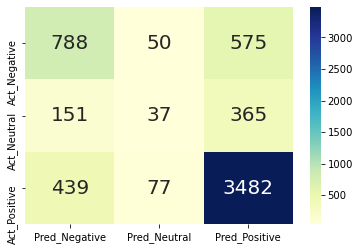

In [59]:
# Fit the first KNN model
knn = KNeighborsClassifier(3)
knn.fit(X_train_tfidf1.toarray(), y_train)
y_pred_cv1_tfidf_knn = knn.predict(X_test_tfidf1)
cm9 = conf_matrix(y_test, y_pred_cv1_tfidf_knn)

In [60]:
# Compile all of the error metrics into a dataframe for comparison
results_tf = pd.DataFrame(list(zip(cm1, cm3, cm4, cm5, cm6, cm7, cm8, cm9)))
results_tf = results_tf.set_index([['Accuracy', 'Negative Accuracy', 'Neutral Accuracy', 'Positive Accuracy']])
results_tf.columns = ['LR_CV', 'MNB_CV', 'BNB_CV', 'KNN_CV', 'LR_TFIDF', 'MNB_TFIDF', 'BNB_TFIDF', 'KNN_TFIDF']
results_tf

,LR_CV,MNB_CV,BNB_CV,KNN_CV,LR_TFIDF,MNB_TFIDF,BNB_TFIDF,KNN_TFIDF
Accuracy,0.84,0.83,0.75,0.70,0.86,0.74,0.75,0.72
Negative Accuracy,0.81,0.80,0.57,0.40,0.82,0.31,0.57,0.56
Neutral Accuracy,0.28,0.14,0.18,0.07,0.11,0.00,0.18,0.07
Positive Accuracy,0.93,0.94,0.90,0.89,0.97,1.00,0.90,0.87
